<ul>
    <li><b>Age :</b> L'âge du patient en années.</li>
    <li><b>Sex :</b> Le sexe du patient. Typiquement codé comme 'M' pour masculin et 'F' pour féminin.</li>
    <ul>
            <li>0 : Femme.</li>
            <li>1 : Homme.</li>
        </ul>
    <li><b>ChestPainType :</b> Type de douleur thoracique. Voici les types courants :
        <ul>
            <li>TA (Typical Angina) : Angine typique.</li>
            <li>ATA (Atypical Angina) : Angine atypique.</li>
            <li>NAP (Non-Anginal Pain) : Douleur non angineuse.</li>
            <li>ASY (Asymptomatic) : Asymptomatique.</li>
        </ul>
    </li>
    <li><b>RestingBP :</b> La pression artérielle au repos (en mm Hg).</li>
    <li><b>Cholesterol :</b> Le taux de cholestérol sérique (en mg/dL).</li>
    <li><b>FastingBS :</b> Le taux de sucre dans le sang après un jeûne. Typiquement, c'est une valeur binaire :
        <ul>
            <li>0 : Si la glycémie à jeun est inférieure à 120 mg/dL.</li>
            <li>1 : Si la glycémie à jeun est supérieure ou égale à 120 mg/dL.</li>
        </ul>
    </li>
    <li><b>RestingECG :</b> Les résultats de l'électrocardiogramme (ECG) au repos. Les valeurs possibles incluent :
        <ul>
            <li>Normal : Résultat normal.</li>
            <li>ST : Présence d'anomalies de segment ST-T (inversion de l'onde T et/ou élévation ou dépression de ST > 0,05 mV).</li>
            <li>LVH : Hypertrophie ventriculaire gauche probable ou certaine d'après les critères d'Estes.</li>
        </ul>
    </li>
    <li><b>MaxHR :</b> La fréquence cardiaque maximale atteinte pendant l'exercice (en bpm).</li>
    <li><b>ExerciseAngina :</b> Angine de poitrine induite par l'exercice. C'est généralement codé comme :
        <ul>
            <li>Y : Oui (présence d'angine de poitrine pendant l'exercice).</li>
            <li>N : Non (absence d'angine de poitrine pendant l'exercice).</li>
        </ul>
    </li>
    <li><b>Oldpeak :</b> Dépression du segment ST induite par l'exercice par rapport au repos (en mm). Cela mesure une sorte de déviation de l'ECG.</li>
    <li><b>ST_Slope :</b> La pente du segment ST pendant l'exercice. Les valeurs typiques sont :
        <ul>
            <li>Up : Montée (ST en hausse).</li>
            <li>Flat : Plate (ST plat).</li>
            <li>Down : Descente (ST en baisse).</li>
        </ul>
    </li>
    <li><b>HeartDisease :</b> Présence d'une maladie cardiaque. Typiquement codé comme :
        <ul>
            <li>1 : Présence d'une maladie cardiaque.</li>
            <li>0 : Absence d'une maladie cardiaque.</li>
        </ul>
    </li>
</ul>


In [146]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv('heart_data.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [149]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [150]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [151]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

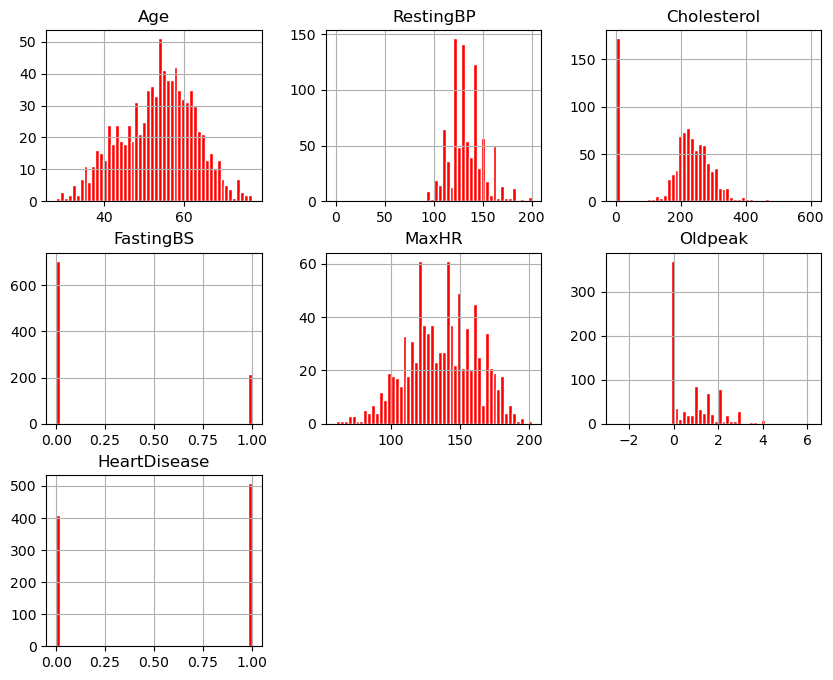

In [152]:
df.hist(bins=50, figsize=(10, 8), ec='w',  color='red')
plt.show()

In [153]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded = df.copy()
categorical_features = list(df.select_dtypes('object').columns)

df_encoded[categorical_features] = df_encoded[categorical_features].apply(label_encoder.fit_transform)
  
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


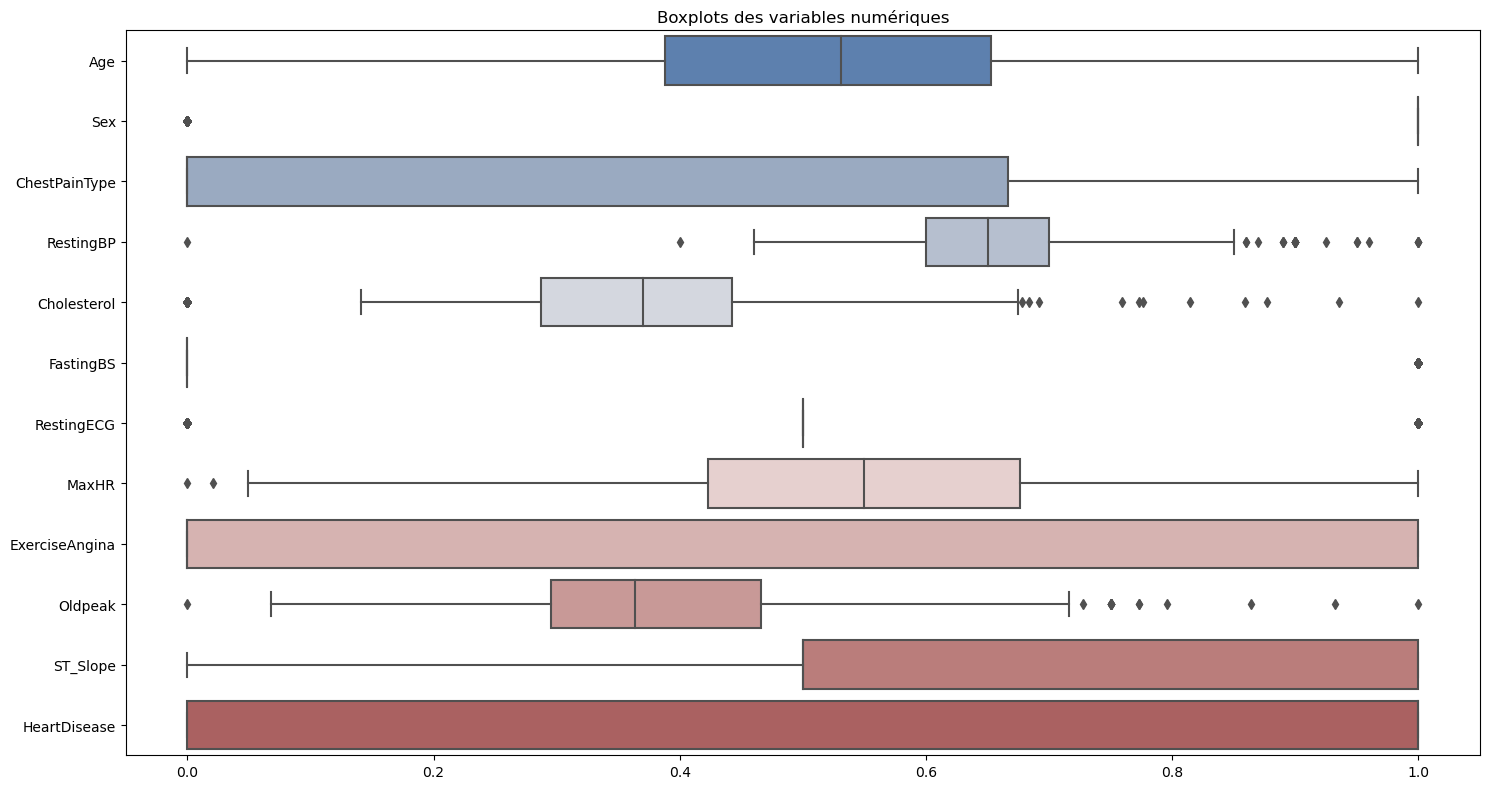

In [154]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

df_stand = df_encoded.copy()
features = list(df_encoded.columns)
scaler = MinMaxScaler()
df_stand[features] = scaler.fit_transform(df_stand[features])
df_stand

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_stand, orient='h', palette='vlag')
plt.title('Boxplots des variables numériques')
plt.tight_layout()
plt.show()

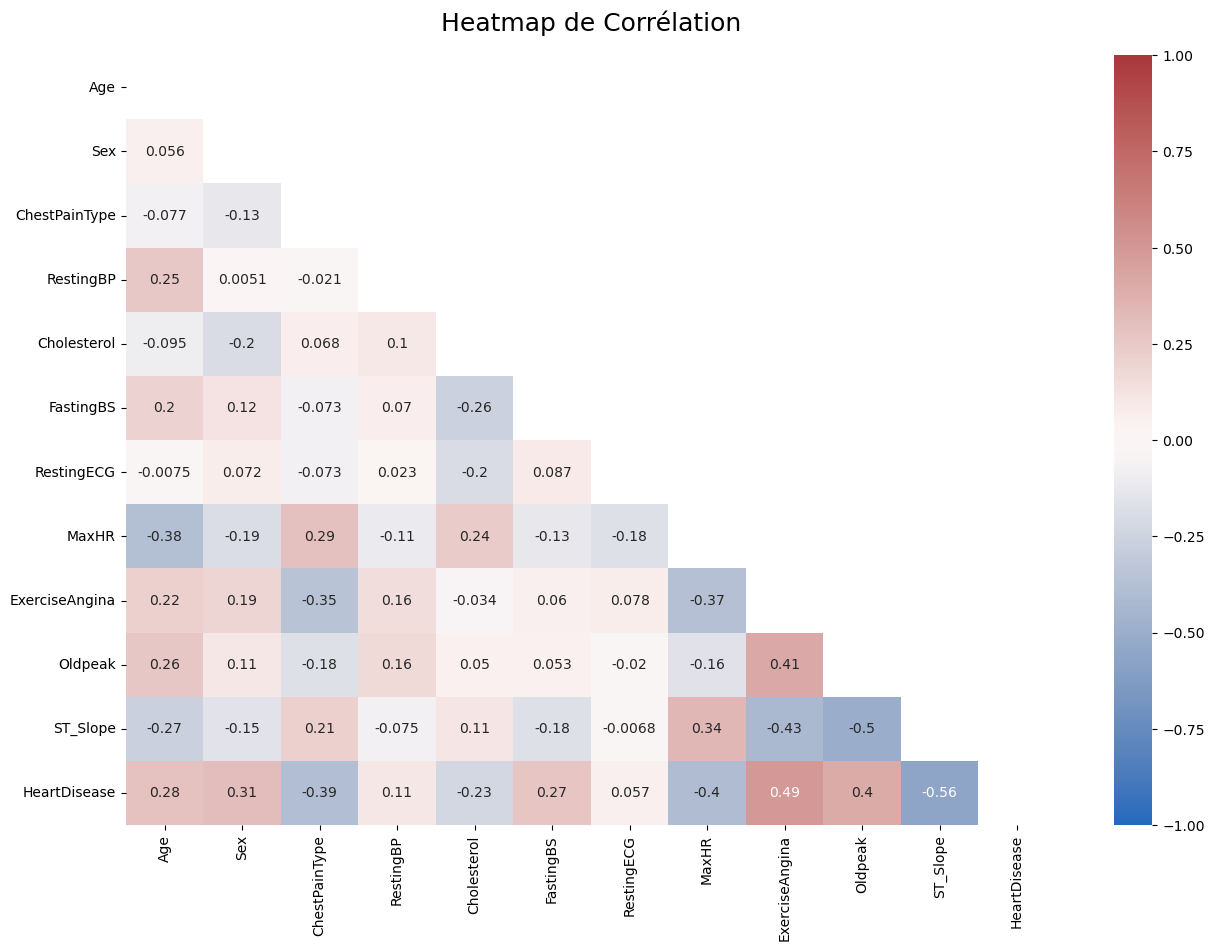

In [155]:
import numpy as np

plt.figure(figsize=(15, 10))
matrix = np.triu(df_encoded.corr())

heatmap = sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, annot=True, mask=matrix, cmap="vlag")
heatmap.set_title('Heatmap de Corrélation', fontdict={'fontsize':18}, pad=18);

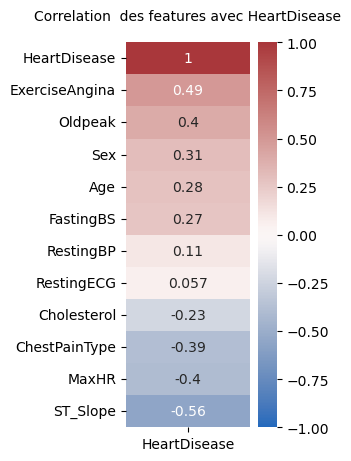

In [156]:
plt.figure(figsize=(2, 5))
heatmap = sns.heatmap(df_encoded.corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap="vlag")
heatmap.set_title('Correlation  des features avec HeartDisease', fontdict={'fontsize':10}, pad=16);